In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('train_IxoE5JN.csv')
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [12]:
df.shape

(94992, 3)

In [3]:
df.isnull().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

In [4]:
test_df = pd.read_csv('test_WudNWDM.csv')
test_df.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [7]:
test_df.shape

(26304, 2)

In [8]:
test_df.isnull().sum()

row_id      0
datetime    0
dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [24]:
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [25]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [40]:
main_df = df[['datetime','energy']]
main_df


,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500
...,...,...
94987,2018-12-31 19:00:00,2528.446800
94988,2018-12-31 20:00:00,2461.883600
94989,2018-12-31 21:00:00,2365.994400
94990,2018-12-31 22:00:00,2342.942800


In [ ]:
main_df.dropna(inplace=True)

In [39]:
main_df

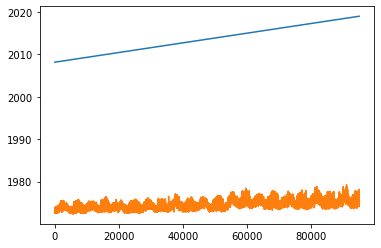

In [34]:
plt.plot(main_df)

In [13]:
df1 = df['energy']
df1

0        1259.985563
1        1095.541500
2        1056.247500
3        1034.742000
4        1026.334500
            ...     
94987    2528.446800
94988    2461.883600
94989    2365.994400
94990    2342.942800
94991    2180.217600
Name: energy, Length: 94992, dtype: float64

In [17]:
df1.isnull().sum()

1900

In [14]:
scale_df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
scale_df1

array([[0.1569359 ],
       [0.09136838],
       [0.07570098],
       ...,
       [0.59792632],
       [0.58873514],
       [0.52385297]])

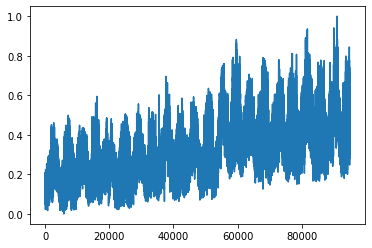

In [16]:
plt.plot(scale_df1)

In [32]:
from statsmodels.tsa.stattools import adfuller

In [42]:
def adfuller_test(energy):
    result = adfuller(energy)
    labels = ['ADF Test Statistics', 'p-value', '#Lags used', '#Obsrvations used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))

In [46]:
adfuller_test(main_df['energy'].dropna())

ADF Test Statistics : -9.527076482286162
p-value : 2.9581209881160637e-16
#Lags used : 67
#Obsrvations used : 93024


In [44]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(main_df['energy'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

In [62]:
94993+26304

121297

In [76]:
df2 = df.copy()
df2.drop(['row_id'], axis = 1, inplace = True)

In [77]:
df2

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500
...,...,...
94987,2018-12-31 19:00:00,2528.446800
94988,2018-12-31 20:00:00,2461.883600
94989,2018-12-31 21:00:00,2365.994400
94990,2018-12-31 22:00:00,2342.942800


In [78]:
test_df2 = test_df.copy()
test_df2.drop(['row_id'], axis = 1, inplace = True)

In [79]:
test_df2

,datetime
0,2019-01-01 00:00:00
1,2019-01-01 01:00:00
2,2019-01-01 02:00:00
3,2019-01-01 03:00:00
4,2019-01-01 04:00:00
...,...
26299,2021-12-31 19:00:00
26300,2021-12-31 20:00:00
26301,2021-12-31 21:00:00
26302,2021-12-31 22:00:00


In [81]:
combi_df = pd.concat([df2, test_df2], axis=0)
combi_df.reset_index(drop=True, inplace=True)

In [82]:
combi_df

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500
...,...,...
121291,2021-12-31 19:00:00,NaN
121292,2021-12-31 20:00:00,NaN
121293,2021-12-31 21:00:00,NaN
121294,2021-12-31 22:00:00,NaN


In [85]:
combi_df['forecast_energy'] = results.predict(start=94992, end=121296, dynamic=True)

In [86]:
combi_df

,datetime,energy,forecast_energy
0,2008-03-01 00:00:00,1259.985563,NaN
1,2008-03-01 01:00:00,1095.541500,NaN
2,2008-03-01 02:00:00,1056.247500,NaN
3,2008-03-01 03:00:00,1034.742000,NaN
4,2008-03-01 04:00:00,1026.334500,NaN
...,...,...,...
121291,2021-12-31 19:00:00,NaN,0.0
121292,2021-12-31 20:00:00,NaN,0.0
121293,2021-12-31 21:00:00,NaN,0.0
121294,2021-12-31 22:00:00,NaN,0.0


In [67]:
combi_df.to_csv('combi_data.csv', index = False, encoding='utf-8')

In [48]:
import seaborn as sns

<AxesSubplot:xlabel='datetime', ylabel='energy'>

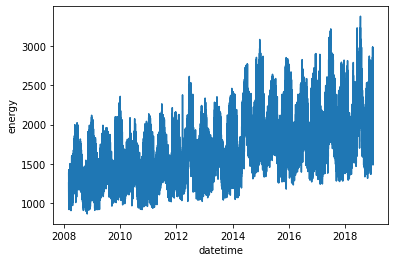

In [49]:
sns.lineplot(data=main_df, x=main_df.datetime, y=main_df.energy)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df['datetime']
y = df['energy']

In [ ]:
X_train, X-test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, shuffle=False, stratify=None)

In [90]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         94992 non-null  datetime64[ns]
 1   energy           93092 non-null  float64       
 2   forecast_energy  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.2 MB


In [91]:
main_copy = main_df.copy()

In [99]:
main_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93092 entries, 0 to 94991
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  93092 non-null  datetime64[ns]
 1   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 MB


In [95]:
main_copy.drop(['forecast_energy'], axis=1, inplace=True)

In [98]:
main_copy.dropna(inplace=True)

In [100]:
main_copy.columns = ['ds', 'y']
main_copy.head()

,ds,y
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


In [106]:
from prophet import Prophet

In [107]:
model = Prophet()

In [109]:
main_copy.columns

Index(['ds', 'y'], dtype='object')

In [110]:
model.fit(main_copy)

19:47:37 - cmdstanpy - INFO - Chain [1] start processing
19:50:17 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [112]:
future_dates = model.make_future_dataframe(periods=365)
future_dates

,ds
0,2008-03-01 00:00:00
1,2008-03-01 01:00:00
2,2008-03-01 02:00:00
3,2008-03-01 03:00:00
4,2008-03-01 04:00:00
...,...
93452,2019-12-27 23:00:00
93453,2019-12-28 23:00:00
93454,2019-12-29 23:00:00
93455,2019-12-30 23:00:00


In [113]:
prediction = model.predict(future_dates)

In [114]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-03-01 00:00:00,1453.340410,976.820098,1434.068834,1453.340410,1453.340410,-241.657707,-241.657707,-241.657707,-80.547998,...,54.723680,54.723680,54.723680,-215.833389,-215.833389,-215.833389,0.0,0.0,0.0,1211.682703
1,2008-03-01 01:00:00,1453.283656,903.670083,1359.315597,1453.283656,1453.283656,-326.670354,-326.670354,-326.670354,-164.331117,...,53.610363,53.610363,53.610363,-215.949600,-215.949600,-215.949600,0.0,0.0,0.0,1126.613302
2,2008-03-01 02:00:00,1453.226901,853.967725,1295.760936,1453.226901,1453.226901,-391.426593,-391.426593,-391.426593,-227.763227,...,52.402375,52.402375,52.402375,-216.065741,-216.065741,-216.065741,0.0,0.0,0.0,1061.800308
3,2008-03-01 03:00:00,1453.170146,801.117663,1261.884319,1453.170146,1453.170146,-429.215658,-429.215658,-429.215658,-264.123236,...,51.089389,51.089389,51.089389,-216.181811,-216.181811,-216.181811,0.0,0.0,0.0,1023.954489
4,2008-03-01 04:00:00,1453.113392,794.353559,1235.621966,1453.113392,1453.113392,-434.846623,-434.846623,-434.846623,-268.209066,...,49.660249,49.660249,49.660249,-216.297807,-216.297807,-216.297807,0.0,0.0,0.0,1018.266768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93452,2019-12-27 23:00:00,2127.037845,1835.875806,2794.801483,1696.784417,2554.396559,192.918528,192.918528,192.918528,11.396977,...,55.751723,55.751723,55.751723,125.769828,125.769828,125.769828,0.0,0.0,0.0,2319.956373
93453,2019-12-28 23:00:00,2127.207012,1763.156052,2717.686649,1693.374345,2556.560766,117.763995,117.763995,117.763995,11.396977,...,-14.811377,-14.811377,-14.811377,121.178395,121.178395,121.178395,0.0,0.0,0.0,2244.971007
93454,2019-12-29 23:00:00,2127.376178,1616.222443,2560.109753,1690.129909,2558.568140,-31.634364,-31.634364,-31.634364,11.396977,...,-159.222627,-159.222627,-159.222627,116.191286,116.191286,116.191286,0.0,0.0,0.0,2095.741815
93455,2019-12-30 23:00:00,2127.545345,1687.605086,2629.041118,1686.885473,2561.132242,50.145008,50.145008,50.145008,11.396977,...,-72.199019,-72.199019,-72.199019,110.947050,110.947050,110.947050,0.0,0.0,0.0,2177.690353


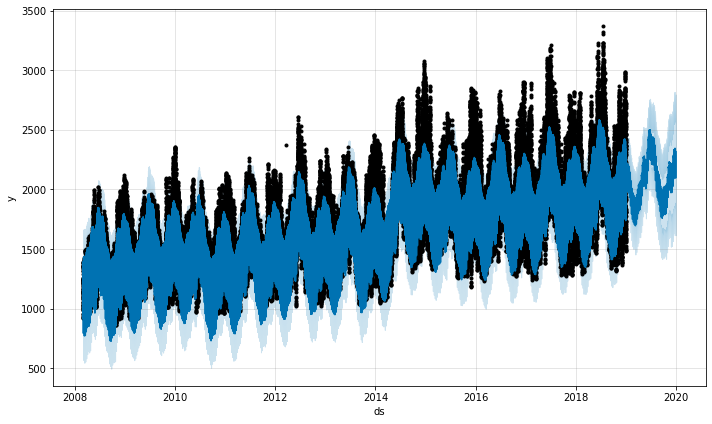

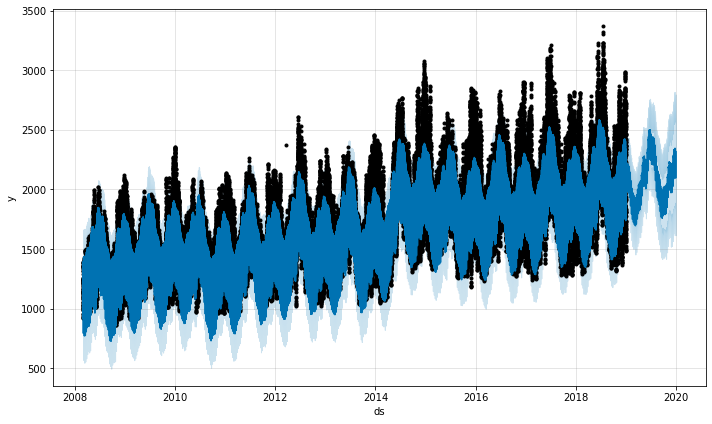

In [115]:
model.plot(prediction)

In [116]:
prediction.yhat

0        1211.682703
1        1126.613302
2        1061.800308
3        1023.954489
4        1018.266768
            ...     
93452    2319.956373
93453    2244.971007
93454    2095.741815
93455    2177.690353
93456    2316.914395
Name: yhat, Length: 93457, dtype: float64

In [121]:
test_df_copy = test_df2.copy()

In [122]:
test_df_copy['datetime'] = pd.to_datetime(test_df_copy['datetime'])
test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  26304 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 205.6 KB


In [125]:
test_df_copy.columns = ['ds']
test_df_copy

,ds
0,2019-01-01 00:00:00
1,2019-01-01 01:00:00
2,2019-01-01 02:00:00
3,2019-01-01 03:00:00
4,2019-01-01 04:00:00
...,...
26299,2021-12-31 19:00:00
26300,2021-12-31 20:00:00
26301,2021-12-31 21:00:00
26302,2021-12-31 22:00:00


In [126]:
prediction2 = model.predict(test_df_copy)

In [127]:
prediction2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 00:00:00,2065.975712,1792.740218,2251.666844,2065.975712,2065.975712,-40.256342,-40.256342,-40.256342,-80.547998,...,-63.720728,-63.720728,-63.720728,104.012384,104.012384,104.012384,0.0,0.0,0.0,2025.719370
1,2019-01-01 01:00:00,2065.982761,1724.158406,2177.816944,2065.982761,2065.982761,-115.729396,-115.729396,-115.729396,-164.331117,...,-55.186751,-55.186751,-55.186751,103.788472,103.788472,103.788472,0.0,0.0,0.0,1950.253365
2,2019-01-01 02:00:00,2065.989809,1674.249915,2131.716271,2065.989809,2065.989809,-170.842897,-170.842897,-170.842897,-227.763227,...,-46.644316,-46.644316,-46.644316,103.564646,103.564646,103.564646,0.0,0.0,0.0,1895.146913
3,2019-01-01 03:00:00,2065.996858,1649.189760,2082.912432,2065.996858,2065.996858,-198.922226,-198.922226,-198.922226,-264.123236,...,-38.139904,-38.139904,-38.139904,103.340914,103.340914,103.340914,0.0,0.0,0.0,1867.074632
4,2019-01-01 04:00:00,2066.003907,1648.911205,2096.758911,2066.003907,2066.003907,-194.810656,-194.810656,-194.810656,-268.209066,...,-29.718876,-29.718876,-29.718876,103.117286,103.117286,103.117286,0.0,0.0,0.0,1871.193250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2021-12-31 19:00:00,2251.347181,-23.822521,5079.801160,-231.168190,4776.788644,308.249494,308.249494,308.249494,145.298280,...,59.162742,59.162742,59.162742,103.788472,103.788472,103.788472,0.0,0.0,0.0,2559.596675
26300,2021-12-31 20:00:00,2251.354229,19.321239,5075.144204,-231.342586,4776.844863,321.273933,321.273933,321.273933,159.306562,...,58.402725,58.402725,58.402725,103.564646,103.564646,103.564646,0.0,0.0,0.0,2572.628162
26301,2021-12-31 21:00:00,2251.361278,20.679883,5111.042590,-231.516983,4776.901083,305.603809,305.603809,305.603809,144.678421,...,57.584474,57.584474,57.584474,103.340914,103.340914,103.340914,0.0,0.0,0.0,2556.965087
26302,2021-12-31 22:00:00,2251.368326,-6.342117,5036.322765,-231.691379,4776.957302,252.551558,252.551558,252.551558,92.731391,...,56.702881,56.702881,56.702881,103.117286,103.117286,103.117286,0.0,0.0,0.0,2503.919884


<AxesSubplot:xlabel='ds', ylabel='yhat'>

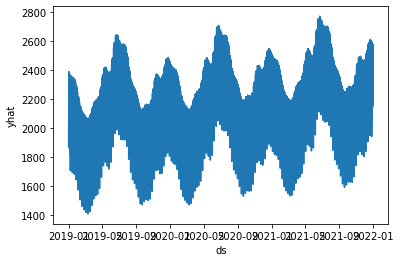

In [128]:
sns.lineplot(data=prediction2, x=prediction2.ds, y=prediction2.yhat)

In [130]:
submission_1 = prediction2[['ds', 'yhat']]
submission_1

,ds,yhat
0,2019-01-01 00:00:00,2025.719370
1,2019-01-01 01:00:00,1950.253365
2,2019-01-01 02:00:00,1895.146913
3,2019-01-01 03:00:00,1867.074632
4,2019-01-01 04:00:00,1871.193250
...,...,...
26299,2021-12-31 19:00:00,2559.596675
26300,2021-12-31 20:00:00,2572.628162
26301,2021-12-31 21:00:00,2556.965087
26302,2021-12-31 22:00:00,2503.919884


In [131]:
submission_1.columns = ['datetime', 'energy']
submission_1

,datetime,energy
0,2019-01-01 00:00:00,2025.719370
1,2019-01-01 01:00:00,1950.253365
2,2019-01-01 02:00:00,1895.146913
3,2019-01-01 03:00:00,1867.074632
4,2019-01-01 04:00:00,1871.193250
...,...,...
26299,2021-12-31 19:00:00,2559.596675
26300,2021-12-31 20:00:00,2572.628162
26301,2021-12-31 21:00:00,2556.965087
26302,2021-12-31 22:00:00,2503.919884


In [132]:
sub_df = pd.read_csv('sample_submission_jn0a7vR.csv')
sub_df

,row_id,energy
0,94993,1702.995014
1,94994,1702.995014
2,94995,1702.995014
3,94996,1702.995014
4,94997,1702.995014
...,...,...
26299,121292,1702.995014
26300,121293,1702.995014
26301,121294,1702.995014
26302,121295,1702.995014


In [133]:
sub1 = pd.concat([sub_df.row_id, submission_1.energy], axis=1)
sub1

,row_id,energy
0,94993,2025.719370
1,94994,1950.253365
2,94995,1895.146913
3,94996,1867.074632
4,94997,1871.193250
...,...,...
26299,121292,2559.596675
26300,121293,2572.628162
26301,121294,2556.965087
26302,121295,2503.919884


In [135]:
sub1.to_csv('submissions/first_sub.csv', index = False, encoding='utf-8')